In [1]:
!ls drive/MyDrive/Classroom/finalExam

'Online Retail.xlsx'


In [2]:
import pandas as pd

In [4]:
retail_df=pd.read_excel('drive/MyDrive/Classroom/finalExam/Online Retail.xlsx')

In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [8]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 Dynamic Pricing Optimization Project")
print("="*50)

🚀 Dynamic Pricing Optimization Project


In [9]:
# PART 1: DATA LOADING AND INITIAL EXPLORATION
print("\n📊 PART 1: DATA LOADING AND EXPLORATION")
print("-"*40)

# Load the dataset
retail_df = pd.read_excel('/content/drive/MyDrive/Classroom/finalExam/Online Retail.xlsx')

print(f"Dataset Shape: {retail_df.shape}")
print(f"Columns: {list(retail_df.columns)}")
print("\nFirst 5 rows:")
print(retail_df.head())

print("\nDataset Info:")
print(retail_df.info())


📊 PART 1: DATA LOADING AND EXPLORATION
----------------------------------------
Dataset Shape: (541909, 8)
Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 

In [10]:
print("\n🧹 PART 2: DATA CLEANING")
print("-"*40)

def clean_retail_data(df):
    """
    Comprehensive data cleaning function for retail dataset

    Parameters:
    df (DataFrame): Raw retail dataset

    Returns:
    DataFrame: Cleaned dataset
    """
    print("Starting data cleaning process...")
    df_clean = df.copy()
    # 1. Handle missing values
    print(f"Missing values before cleaning:\n{df_clean.isnull().sum()}")

    # Remove rows with missing CustomerID (can't analyze customer behavior without ID)
    df_clean = df_clean.dropna(subset=['CustomerID'])

    # Remove rows with missing Description
    df_clean = df_clean.dropna(subset=['Description'])

    # 2. Handle negative quantities and prices (returns/refunds)
    print(f"Negative quantities: {(df_clean['Quantity'] < 0).sum()}")
    print(f"Negative unit prices: {(df_clean['UnitPrice'] < 0).sum()}")

    # For pricing optimization, we'll focus on actual sales (positive quantities)
    df_clean = df_clean[df_clean['Quantity'] > 0]
    df_clean = df_clean[df_clean['UnitPrice'] > 0]

    # 3. Remove outliers using IQR method
    def remove_outliers_iqr(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Remove extreme outliers in Quantity and UnitPrice
    df_clean = remove_outliers_iqr(df_clean, 'Quantity')
    df_clean = remove_outliers_iqr(df_clean, 'UnitPrice')

    # 4. Create additional features for analysis
    df_clean['TotalSales'] = df_clean['Quantity'] * df_clean['UnitPrice']
    df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
    df_clean['Year'] = df_clean['InvoiceDate'].dt.year
    df_clean['Month'] = df_clean['InvoiceDate'].dt.month
    df_clean['Day'] = df_clean['InvoiceDate'].dt.day
    df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.dayofweek
    df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

    print(f"Dataset shape after cleaning: {df_clean.shape}")
    print("Data cleaning completed successfully! ✅")

    return df_clean

# Apply cleaning function
retail_clean = clean_retail_data(retail_df)


🧹 PART 2: DATA CLEANING
----------------------------------------
Starting data cleaning process...
Missing values before cleaning:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Negative quantities: 8905
Negative unit prices: 0
Dataset shape after cleaning: (338151, 14)
Data cleaning completed successfully! ✅


In [11]:
from google.colab import files
retail_df.to_csv('retail_clean.csv')
files.download('retail_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# PART 3: EXPLORATORY DATA ANALYSIS (EDA)
print("\n📈 PART 3: EXPLORATORY DATA ANALYSIS")
print("-"*40)

def generate_descriptive_statistics(df):
    """Generate comprehensive descriptive statistics"""
    print("DESCRIPTIVE STATISTICS")
    print("="*30)

    # Basic statistics
    print("\nNumerical Variables Summary:")
    numerical_cols = ['Quantity', 'UnitPrice', 'TotalSales']
    print(df[numerical_cols].describe())

    # Categorical variables
    print(f"\nUnique Countries: {df['Country'].nunique()}")
    print(f"Unique Products: {df['StockCode'].nunique()}")
    print(f"Unique Customers: {df['CustomerID'].nunique()}")
    print(f"Date Range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")

    return df[numerical_cols].describe()


📈 PART 3: EXPLORATORY DATA ANALYSIS
----------------------------------------


In [13]:
# PART 4: FEATURE ENGINEERING FOR PRICING MODEL
print("\n🔧 PART 4: FEATURE ENGINEERING")
print("-"*40)

def create_pricing_features(df):
    """
    Create features for dynamic pricing model

    Features include:
    - Demand patterns
    - Customer behavior
    - Product characteristics
    - Temporal features
    """
    print("Creating pricing optimization features...")

    # 1. Demand Features
    # Product demand frequency
    product_demand = df.groupby('StockCode').agg({
        'InvoiceNo': 'count',
        'Quantity': ['sum', 'mean'],
        'TotalSales': ['sum', 'mean'],
        'UnitPrice': ['mean', 'std']
    }).round(2)

    product_demand.columns = [
        'OrderFrequency', 'TotalQuantitySold', 'AvgQuantityPerOrder',
        'TotalRevenue', 'AvgRevenuePerOrder', 'AvgPrice', 'PriceVolatility'
    ]

    # 2. Customer Behavior Features
    customer_behavior = df.groupby('CustomerID').agg({
        'InvoiceNo': 'count',
        'TotalSales': ['sum', 'mean'],
        'UnitPrice': 'mean'
    }).round(2)

    customer_behavior.columns = ['CustomerOrderCount', 'CustomerTotalSpent', 'CustomerAvgOrderValue', 'CustomerAvgPricePoint']

    # 3. Create main dataset with features
    df_features = df.copy()

    # Merge product features
    df_features = df_features.merge(product_demand, left_on='StockCode', right_index=True, how='left')

    # Merge customer features
    df_features = df_features.merge(customer_behavior, left_on='CustomerID', right_index=True, how='left')

    # 4. Create additional temporal and behavioral features
    df_features['IsWeekend'] = df_features['DayOfWeek'].isin([5, 6]).astype(int)
    df_features['IsHighDemandHour'] = df_features['Hour'].isin([10, 11, 12, 13, 14, 15]).astype(int)

    # Price elasticity approximation (quantity sensitivity to price)
    df_features['PriceElasticity'] = df_features['AvgQuantityPerOrder'] / (df_features['AvgPrice'] + 1)

    # Competition proxy (similar priced products)
    df_features['PriceRank'] = df_features.groupby('Month')['UnitPrice'].rank(pct=True)

    print(f"Feature engineering completed! New dataset shape: {df_features.shape}")
    print(f"New features added: {set(df_features.columns) - set(df.columns)}")

    return df_features

# Apply feature engineering
retail_features = create_pricing_features(retail_clean)



🔧 PART 4: FEATURE ENGINEERING
----------------------------------------
Creating pricing optimization features...
Feature engineering completed! New dataset shape: (338151, 29)
New features added: {'OrderFrequency', 'CustomerOrderCount', 'IsWeekend', 'CustomerTotalSpent', 'PriceElasticity', 'AvgPrice', 'AvgRevenuePerOrder', 'TotalRevenue', 'CustomerAvgOrderValue', 'PriceRank', 'AvgQuantityPerOrder', 'PriceVolatility', 'TotalQuantitySold', 'CustomerAvgPricePoint', 'IsHighDemandHour'}


DESCRIPTIVE STATISTICS

Numerical Variables Summary:
            Quantity      UnitPrice     TotalSales
count  338151.000000  338151.000000  338151.000000
mean        7.476917       2.192017      12.771994
std         6.770795       1.544770      13.177003
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       3.800000
50%         6.000000       1.650000      10.080000
75%        12.000000       2.950000      17.400000
max        27.000000       7.500000     178.800000

Unique Countries: 37
Unique Products: 3392
Unique Customers: 4191
Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00

Creating visualizations...


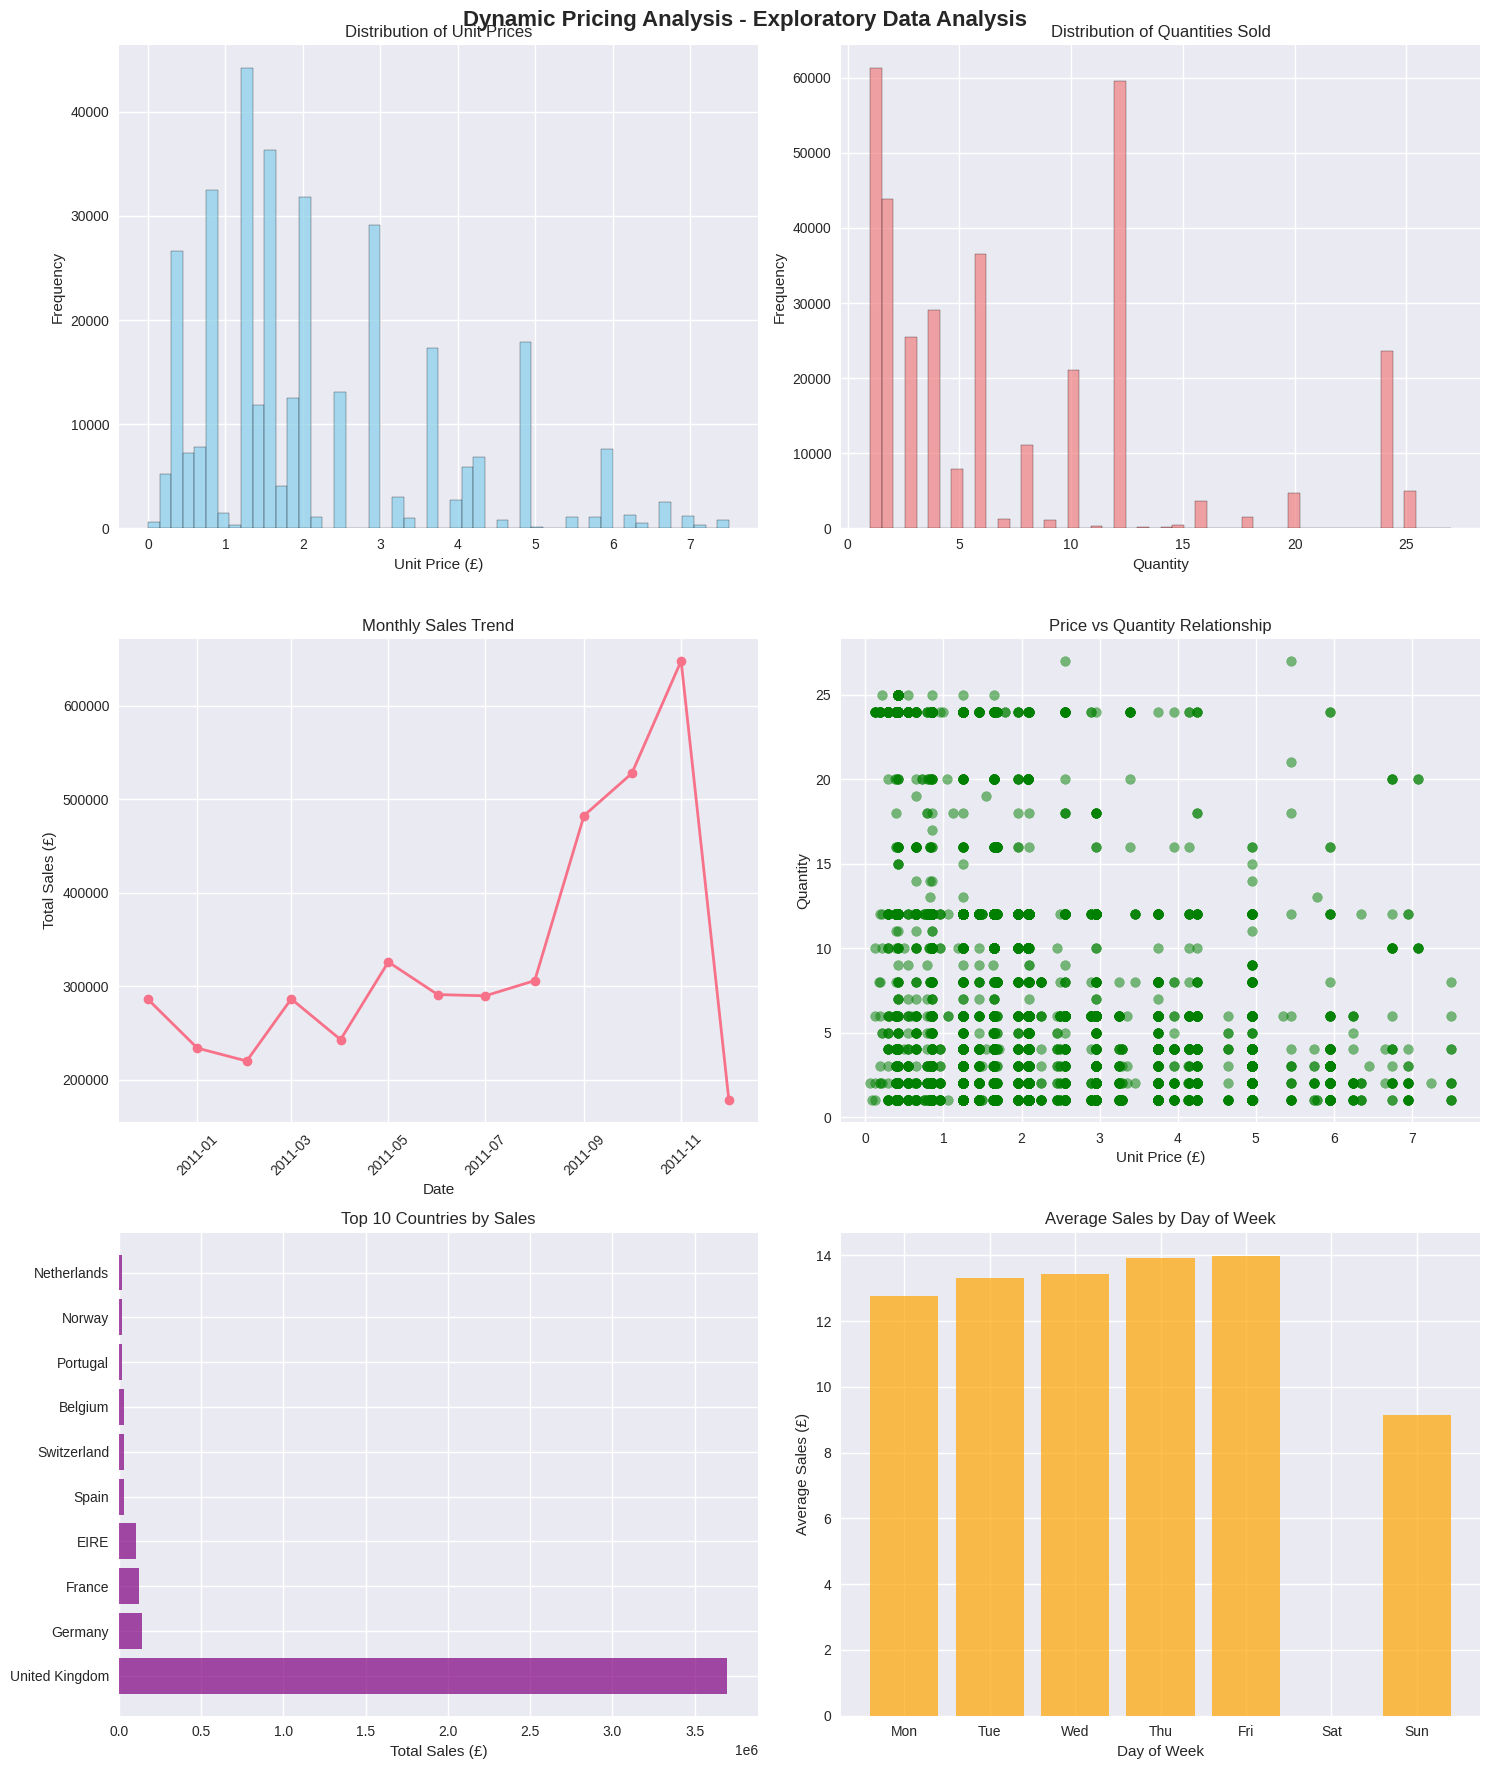

In [14]:
def create_visualizations(df):
    """Create comprehensive visualizations for EDA"""
    print("\nCreating visualizations...")

    # Set up the plotting area
    fig, axes = plt.subplots(3, 2, figsize=(15, 18))
    fig.suptitle('Dynamic Pricing Analysis - Exploratory Data Analysis', fontsize=16, fontweight='bold')

    # 1. Price Distribution
    axes[0, 0].hist(df['UnitPrice'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Distribution of Unit Prices')
    axes[0, 0].set_xlabel('Unit Price (£)')
    axes[0, 0].set_ylabel('Frequency')

    # 2. Quantity Distribution
    axes[0, 1].hist(df['Quantity'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Distribution of Quantities Sold')
    axes[0, 1].set_xlabel('Quantity')
    axes[0, 1].set_ylabel('Frequency')

    # 3. Sales over Time
    monthly_sales = df.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()
    monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))
    axes[1, 0].plot(monthly_sales['Date'], monthly_sales['TotalSales'], marker='o', linewidth=2)
    axes[1, 0].set_title('Monthly Sales Trend')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Total Sales (£)')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # 4. Price vs Quantity Relationship
    sample_data = df.sample(n=min(5000, len(df)))  # Sample for better visualization
    axes[1, 1].scatter(sample_data['UnitPrice'], sample_data['Quantity'], alpha=0.5, color='green')
    axes[1, 1].set_title('Price vs Quantity Relationship')
    axes[1, 1].set_xlabel('Unit Price (£)')
    axes[1, 1].set_ylabel('Quantity')

    # 5. Top Countries by Sales
    country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)
    axes[2, 0].barh(country_sales.index, country_sales.values, color='purple', alpha=0.7)
    axes[2, 0].set_title('Top 10 Countries by Sales')
    axes[2, 0].set_xlabel('Total Sales (£)')

    # 6. Average Sales by Day of Week
    dow_sales = df.groupby('DayOfWeek')['TotalSales'].mean()
    # Ensure all days of the week (0-6) are present
    dow_sales = dow_sales.reindex(range(7), fill_value=0)
    dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    axes[2, 1].bar(dow_names, dow_sales.values, color='orange', alpha=0.7)
    axes[2, 1].set_title('Average Sales by Day of Week')
    axes[2, 1].set_xlabel('Day of Week')
    axes[2, 1].set_ylabel('Average Sales (£)')


    plt.tight_layout()
    plt.show()

# Generate statistics and visualizations
desc_stats = generate_descriptive_statistics(retail_clean)
create_visualizations(retail_clean)


👥 PART 5: CUSTOMER SEGMENTATION
----------------------------------------
Performing customer segmentation...
Customer Segments Analysis:
         Recency  Frequency  Monetary
Cluster                              
0          14.05     388.26   5050.66
1          43.42      61.45    807.22
2           1.00    5124.25  43682.49
3         247.38      24.62    310.15


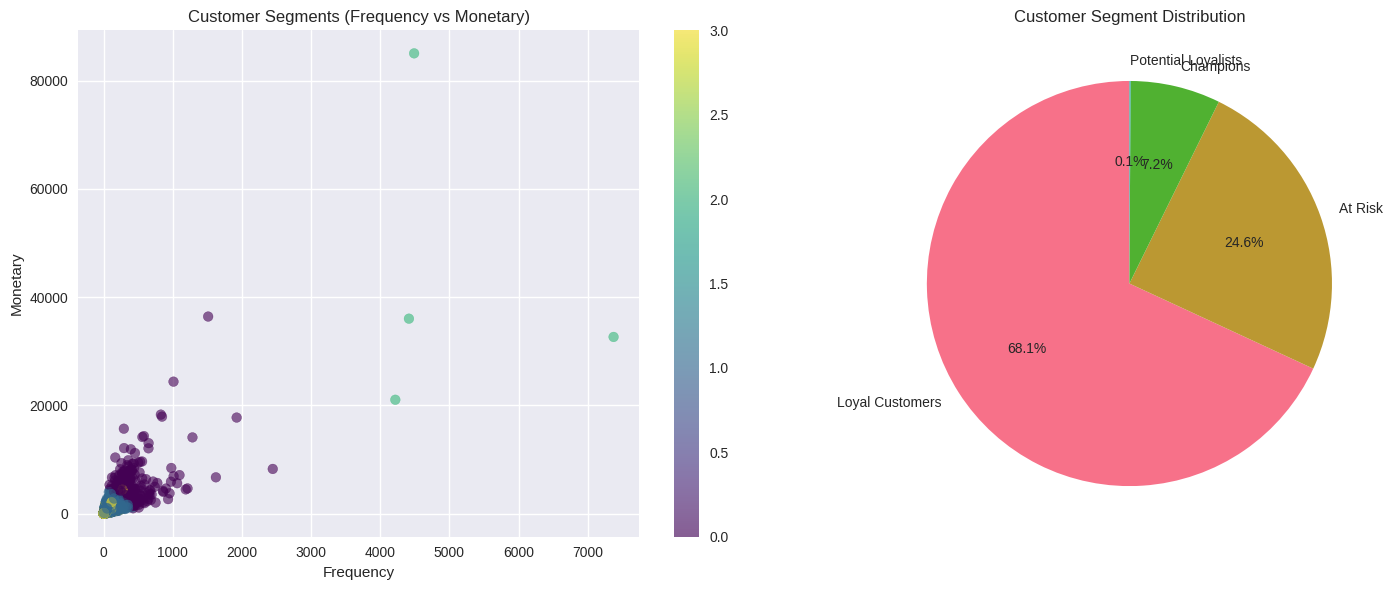

In [15]:
# PART 5: CUSTOMER SEGMENTATION (CLUSTERING)
print("\n👥 PART 5: CUSTOMER SEGMENTATION")
print("-"*40)

def perform_customer_segmentation(df):
    """
    Perform customer segmentation using RFM analysis and K-means clustering
    """
    print("Performing customer segmentation...")

    # RFM Analysis (Recency, Frequency, Monetary)
    current_date = df['InvoiceDate'].max()

    rfm = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
        'InvoiceNo': 'count',  # Frequency
        'TotalSales': 'sum'  # Monetary
    }).round(2)

    rfm.columns = ['Recency', 'Frequency', 'Monetary']

    # Normalize features for clustering
    scaler = StandardScaler()
    rfm_scaled = scaler.fit_transform(rfm)

    # K-means clustering
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

    # Analyze clusters
    cluster_analysis = rfm.groupby('Cluster').agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean'
    }).round(2)

    print("Customer Segments Analysis:")
    print(cluster_analysis)

    # Assign segment names
    segment_names = {
        0: 'Champions',
        1: 'Loyal Customers',
        2: 'Potential Loyalists',
        3: 'At Risk'
    }

    rfm['Segment'] = rfm['Cluster'].map(segment_names)

    # Visualize clusters
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # RFM 3D visualization (2D projection)
    scatter = axes[0].scatter(rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis', alpha=0.6)
    axes[0].set_xlabel('Frequency')
    axes[0].set_ylabel('Monetary')
    axes[0].set_title('Customer Segments (Frequency vs Monetary)')
    plt.colorbar(scatter, ax=axes[0])

    # Segment distribution
    segment_counts = rfm['Segment'].value_counts()
    axes[1].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Customer Segment Distribution')

    plt.tight_layout()
    plt.show()

    return rfm

# Perform customer segmentation
customer_segments = perform_customer_segmentation(retail_features)



🤖 PART 6: MACHINE LEARNING MODELS
----------------------------------------
Preparing data for machine learning...
ML dataset shape: (338151, 14)
Features: ['Quantity', 'Month', 'DayOfWeek', 'Hour', 'IsWeekend', 'IsHighDemandHour', 'OrderFrequency', 'TotalQuantitySold', 'AvgQuantityPerOrder', 'CustomerOrderCount', 'CustomerAvgOrderValue', 'PriceElasticity', 'PriceRank']
Training pricing optimization models...

Training Linear Regression...
  RMSE: 0.5067
  MAE: 0.3701
  R²: 0.8922

Training Random Forest...
  RMSE: 0.0063
  MAE: 0.0003
  R²: 1.0000

Training Gradient Boosting...
  RMSE: 0.0435
  MAE: 0.0205
  R²: 0.9992

📊 PART 7: MODEL EVALUATION
----------------------------------------
MODEL PERFORMANCE COMPARISON:
      Linear Regression  Random Forest  Gradient Boosting
RMSE             0.5067         0.0063             0.0435
MAE              0.3701         0.0003             0.0205
R²               0.8922         1.0000             0.9992

Best Model: Random Forest


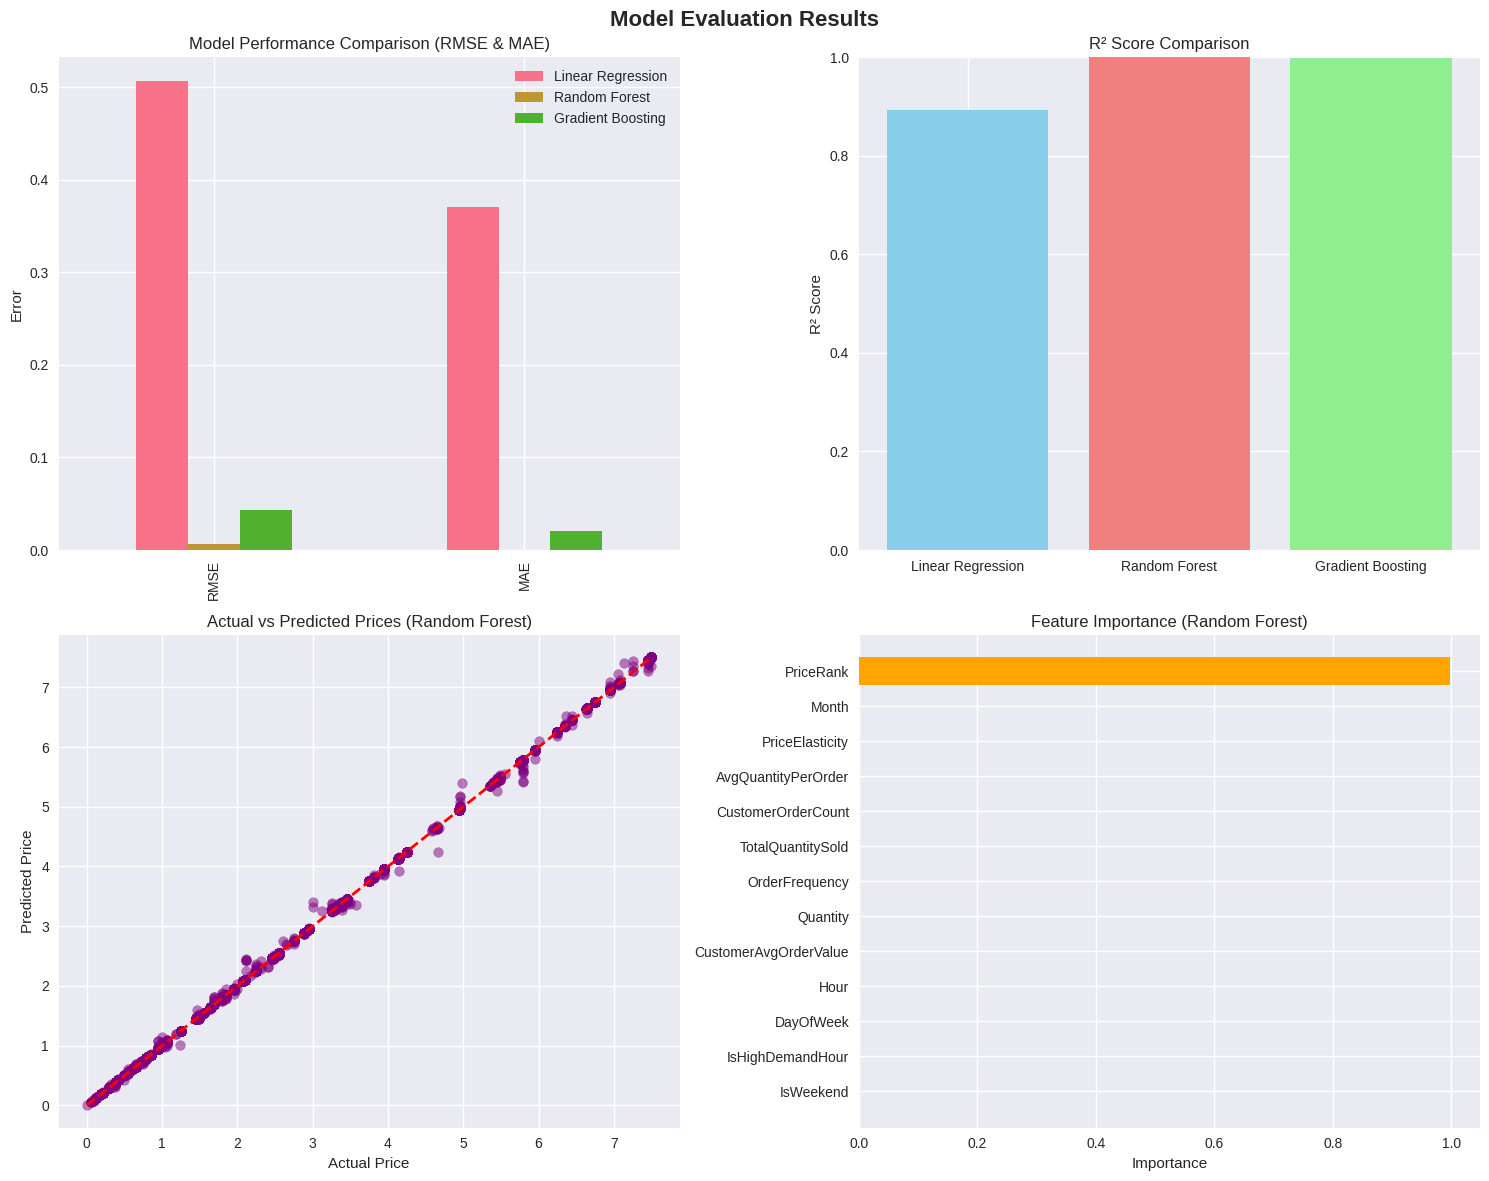

In [16]:
# PART 6: MACHINE LEARNING MODELS FOR PRICE OPTIMIZATION
print("\n🤖 PART 6: MACHINE LEARNING MODELS")
print("-"*40)

def prepare_ml_data(df):
    """Prepare data for machine learning models"""
    print("Preparing data for machine learning...")

    # Select features for modeling
    feature_columns = [
        'Quantity', 'Month', 'DayOfWeek', 'Hour', 'IsWeekend', 'IsHighDemandHour',
        'OrderFrequency', 'TotalQuantitySold', 'AvgQuantityPerOrder',
        'CustomerOrderCount', 'CustomerAvgOrderValue', 'PriceElasticity', 'PriceRank'
    ]

    # Prepare the dataset
    ml_data = df[feature_columns + ['UnitPrice']].copy()
    ml_data = ml_data.dropna()

    # Features and target
    X = ml_data[feature_columns]
    y = ml_data['UnitPrice']

    print(f"ML dataset shape: {ml_data.shape}")
    print(f"Features: {feature_columns}")

    return X, y, feature_columns

def train_pricing_models(X, y):
    """Train multiple models for price prediction"""
    print("Training pricing optimization models...")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    }

    # Train and evaluate models
    results = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")

        # Train model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {
            'model': model,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2,
            'predictions': y_pred
        }

        print(f"  RMSE: {rmse:.4f}")
        print(f"  MAE: {mae:.4f}")
        print(f"  R²: {r2:.4f}")

    return results, X_test, y_test

# Prepare data and train models
X, y, feature_names = prepare_ml_data(retail_features)
model_results, X_test, y_test = train_pricing_models(X, y)

# PART 7: MODEL EVALUATION AND VISUALIZATION
print("\n📊 PART 7: MODEL EVALUATION")
print("-"*40)

def evaluate_and_visualize_models(results, X_test, y_test, feature_names):
    """Comprehensive model evaluation and visualization"""

    # Model comparison
    comparison_df = pd.DataFrame({
        name: [metrics['RMSE'], metrics['MAE'], metrics['R²']]
        for name, metrics in results.items()
    }, index=['RMSE', 'MAE', 'R²'])

    print("MODEL PERFORMANCE COMPARISON:")
    print(comparison_df.round(4))

    # Find best model
    best_model_name = min(results.keys(), key=lambda x: results[x]['RMSE'])
    best_model = results[best_model_name]['model']

    print(f"\nBest Model: {best_model_name}")

    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Model Evaluation Results', fontsize=16, fontweight='bold')

    # 1. Model comparison
    comparison_df.loc[['RMSE', 'MAE']].plot(kind='bar', ax=axes[0, 0])
    axes[0, 0].set_title('Model Performance Comparison (RMSE & MAE)')
    axes[0, 0].set_ylabel('Error')
    axes[0, 0].legend()

    # 2. R² comparison
    r2_scores = [results[name]['R²'] for name in results.keys()]
    axes[0, 1].bar(results.keys(), r2_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[0, 1].set_title('R² Score Comparison')
    axes[0, 1].set_ylabel('R² Score')
    axes[0, 1].set_ylim(0, 1)

    # 3. Actual vs Predicted (Best Model)
    y_pred_best = results[best_model_name]['predictions']
    axes[1, 0].scatter(y_test, y_pred_best, alpha=0.5, color='purple')
    axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[1, 0].set_xlabel('Actual Price')
    axes[1, 0].set_ylabel('Predicted Price')
    axes[1, 0].set_title(f'Actual vs Predicted Prices ({best_model_name})')

    # 4. Feature Importance (if available)
    if hasattr(best_model, 'feature_importances_'):
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=True)

        axes[1, 1].barh(importance_df['Feature'], importance_df['Importance'], color='orange')
        axes[1, 1].set_title(f'Feature Importance ({best_model_name})')
        axes[1, 1].set_xlabel('Importance')
    else:
        axes[1, 1].text(0.5, 0.5, 'Feature importance not available\nfor this model type',
                       ha='center', va='center', transform=axes[1, 1].transAxes)
        axes[1, 1].set_title('Feature Importance')

    plt.tight_layout()
    plt.show()

    return best_model_name, best_model

# Evaluate models
best_model_name, best_model = evaluate_and_visualize_models(model_results, X_test, y_test, feature_names)


In [17]:
# PART 8: PRICING OPTIMIZATION STRATEGY
print("\n💰 PART 8: PRICING OPTIMIZATION STRATEGY")
print("-"*40)

def create_pricing_strategy(df, model, customer_segments, feature_names):
    """
    Create dynamic pricing strategy based on model insights
    """
    print("Creating dynamic pricing optimization strategy...")

    # 1. Price Sensitivity Analysis
    sample_data = df.sample(n=1000, random_state=42)
    X_sample = sample_data[feature_names]

    # Current prices vs optimized prices
    current_prices = sample_data['UnitPrice'].values
    predicted_prices = model.predict(X_sample)

    # Calculate potential revenue impact
    price_diff = predicted_prices - current_prices
    revenue_impact = price_diff * sample_data['Quantity'].values

    print(f"Average price difference: £{np.mean(price_diff):.2f}")
    print(f"Potential revenue impact: £{np.sum(revenue_impact):.2f}")

    # 2. Segment-based pricing recommendations
    print("\nSEGMENT-BASED PRICING RECOMMENDATIONS:")
    print("-" * 40)

    segment_pricing = {
        'Champions': {'strategy': 'Premium Pricing', 'adjustment': '+10%', 'reason': 'High value customers, less price sensitive'},
        'Loyal Customers': {'strategy': 'Value Pricing', 'adjustment': '+5%', 'reason': 'Regular customers, moderate price sensitivity'},
        'Potential Loyalists': {'strategy': 'Competitive Pricing', 'adjustment': '0%', 'reason': 'Price-conscious, need value demonstration'},
        'At Risk': {'strategy': 'Discount Pricing', 'adjustment': '-5%', 'reason': 'Need incentives to retain'}
    }

    for segment, strategy in segment_pricing.items():
        print(f"{segment}:")
        print(f"  Strategy: {strategy['strategy']}")
        print(f"  Price Adjustment: {strategy['adjustment']}")
        print(f"  Reason: {strategy['reason']}\n")

    return price_diff, revenue_impact, segment_pricing

# Create pricing strategy
price_differences, revenue_impact, pricing_strategy = create_pricing_strategy(
    retail_features, best_model, customer_segments, feature_names
)


💰 PART 8: PRICING OPTIMIZATION STRATEGY
----------------------------------------
Creating dynamic pricing optimization strategy...
Average price difference: £0.00
Potential revenue impact: £1.72

SEGMENT-BASED PRICING RECOMMENDATIONS:
----------------------------------------
Champions:
  Strategy: Premium Pricing
  Price Adjustment: +10%
  Reason: High value customers, less price sensitive

Loyal Customers:
  Strategy: Value Pricing
  Price Adjustment: +5%
  Reason: Regular customers, moderate price sensitivity

Potential Loyalists:
  Strategy: Competitive Pricing
  Price Adjustment: 0%
  Reason: Price-conscious, need value demonstration

At Risk:
  Strategy: Discount Pricing
  Price Adjustment: -5%
  Reason: Need incentives to retain



In [18]:
# PART 9: INNOVATION - ENSEMBLE PRICING MODEL
print("\n🚀 PART 9: INNOVATION - ENSEMBLE PRICING MODEL")
print("-"*40)

def create_ensemble_pricing_model(X, y):
    """
    Create an innovative ensemble model combining multiple approaches
    """
    print("Creating innovative ensemble pricing model...")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create ensemble with different algorithms
    from sklearn.ensemble import VotingRegressor

    # Base models
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
    lr = LinearRegression()

    # Create ensemble
    ensemble = VotingRegressor([
        ('rf', rf),
        ('gb', gb),
        ('lr', lr)
    ])

    # Train ensemble
    ensemble.fit(X_train, y_train)

    # Evaluate
    y_pred_ensemble = ensemble.predict(X_test)

    ensemble_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
    ensemble_r2 = r2_score(y_test, y_pred_ensemble)

    print(f"Ensemble Model Performance:")
    print(f"  RMSE: {ensemble_rmse:.4f}")
    print(f"  R²: {ensemble_r2:.4f}")

    return ensemble, ensemble_rmse, ensemble_r2

# Create ensemble model
ensemble_model, ensemble_rmse, ensemble_r2 = create_ensemble_pricing_model(X, y)



🚀 PART 9: INNOVATION - ENSEMBLE PRICING MODEL
----------------------------------------
Creating innovative ensemble pricing model...
Ensemble Model Performance:
  RMSE: 0.1714
  R²: 0.9877
